# Retweet analysis

We start by importing all the packages that we'll need.

In [1]:
import data
import ngram_utils
import word_cloud
import timeline
import utils
from config import ngram_stop_words, bigrams_to_remove, trigrams_to_remove, fourgrams_to_remove
import pandas as pd
from collections import Counter

## Import data

In [2]:
tweets = data.get_retweets(remove_mentions=False, remove_hashtags=True, remove_urls=True)

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

In [4]:
tweets.columns

Index(['id', 'author_id', 'created_at', 'reply_settings', 'conversation_id',
       'source', 'in_reply_to_user_id', 'text', 'possibly_sensitive', 'lang',
       'referenced_tweets', 'referenced_tweets.id',
       'referenced_tweets.author_id', 'referenced_tweets.type',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'entities.mentions', 'entities.urls', 'entities.hashtags',
       'entities.annotations', 'attachments.media_keys',
       'attachments.media_types', 'user.description', 'user.verified',
       'user.id', 'user.protected', 'user.url', 'user.profile_image_url',
       'user.location', 'user.name', 'user.created_at', 'user.username',
       'user.public_metrics.followers_count',
       'user.public_metrics.following_count',
       'user.public_metrics.tweet_count', 'user.public_metrics.listed_count',
       'user.entities.description.hashtags', 'user.entities.url.urls',
       'user

In [5]:
tweets.describe()

,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,user.public_metrics.followers_count,user.public_metrics.following_count,user.public_metrics.tweet_count,user.public_metrics.listed_count
count,9190.000000,9190.0,9190.0,9190.0,9190.000000,9190.000000,9190.000000,9190.000000
mean,35.529271,0.0,0.0,0.0,3593.563112,1127.932318,5442.265941,118.744396
std,2107.090085,0.0,0.0,0.0,1334.653435,442.097484,3253.204043,65.353862
min,1.000000,0.0,0.0,0.0,1363.000000,288.000000,755.000000,20.000000
25%,2.000000,0.0,0.0,0.0,2015.000000,778.000000,2379.000000,61.000000
50%,4.000000,0.0,0.0,0.0,4188.000000,1279.000000,3123.000000,92.000000
75%,7.000000,0.0,0.0,0.0,4763.000000,1548.000000,8807.000000,185.000000
max,199589.000000,0.0,0.0,0.0,4763.000000,1548.000000,8807.000000,185.000000


## Authors

In [6]:
tweets_by_author = utils.get_tweets_by_authors(tweets, utils.author_ids)

## Retweet counter
Go through all the retweets in the dataset and check which account posted the original tweet, then check how often each of the accounts that we analyze appears in that list.
As we can see, "Fiksu Kalasatama" gets retweeted the most by the other accounts (321 times) while "Smart & Clean"'s tweets are rarely retweeted by the other accounts (14 times).

In [7]:
retweet_authors = tweets['referenced_tweets.author_id']
most_common_retweet_authors = Counter(retweet_authors).most_common()
for author_id, times in most_common_retweet_authors:
    if author_id in utils.authors:
        print(utils.authors[author_id], times)

Fiksu Kalasatama 321
ForumViriumHelsinki 243
HelsinkiBusinessHub 63
Helsingin ilmastoteot 45
Helsinki Smart Region 28
Smart & Clean 14


## Find most common terms

In [8]:
tweet_words = utils.tweets_to_words(tweets)
most_common_terms = Counter(tweet_words).most_common(50)
most_common_terms

[('helsinki', 1287),
 ('forumvirium', 973),
 ('city', 866),
 ('smart', 526),
 ('elohelsinki', 299),
 ('kaisaspilling', 282),
 ('helviestinta', 280),
 ('finland', 263),
 ('great', 250),
 ('citysdk_hanna', 231),
 ('open', 224),
 ('join', 219),
 ('smartclean_fi', 210),
 ('project', 206),
 ('data', 202),
 ('kaupunki', 200),
 ('today', 199),
 ('fabulospcp', 197),
 ('veeraimustonen', 197),
 ('world', 194),
 ('mobility', 193),
 ('solutions', 185),
 ('one', 178),
 ('event', 177),
 ('select4city', 173),
 ('finnish', 169),
 ('innovation', 163),
 ('hrinfoshare', 161),
 ('future', 160),
 ('business', 160),
 ('goodnewsfinland', 158),
 ('companies', 144),
 ('day', 143),
 ('ilmastokumppani', 138),
 ('kalasatama', 137),
 ('urban', 136),
 ('htt', 134),
 ('vuosi', 133),
 ('maijalea', 130),
 ('best', 125),
 ('kuutosaika', 124),
 ('aapris', 122),
 ('team', 120),
 ('nordic', 118),
 ('first', 117),
 ('fabulos', 116),
 ('next', 114),
 ('co', 112),
 ('mahartikainen', 112),
 ('databusinessfi', 110)]

## Most frequent terms per author

In [9]:
terms_by_author = {}
for author_id in utils.author_ids:
    words_per_author = utils.tweets_to_words(tweets_by_author[author_id])
    terms = Counter(words_per_author)
    terms_by_author[author_id] = terms

In [10]:
for term, number in most_common_terms:
    print('"' + term + '"' + ' occurs ' + str(number) + ' times:')
    for author_id in utils.author_ids:
        print(utils.authors[author_id], terms_by_author[author_id][term])
    print('\n')

"helsinki" occurs 1287 times:
ForumViriumHelsinki 591
Fiksu Kalasatama 115
HelsinkiBusinessHub 233
Helsinki Smart Region 129
Smart & Clean 62
Helsingin ilmastoteot 157


"forumvirium" occurs 973 times:
ForumViriumHelsinki 646
Fiksu Kalasatama 245
HelsinkiBusinessHub 32
Helsinki Smart Region 28
Smart & Clean 8
Helsingin ilmastoteot 14


"city" occurs 866 times:
ForumViriumHelsinki 458
Fiksu Kalasatama 152
HelsinkiBusinessHub 82
Helsinki Smart Region 79
Smart & Clean 54
Helsingin ilmastoteot 41


"smart" occurs 526 times:
ForumViriumHelsinki 250
Fiksu Kalasatama 119
HelsinkiBusinessHub 51
Helsinki Smart Region 54
Smart & Clean 44
Helsingin ilmastoteot 8


"elohelsinki" occurs 299 times:
ForumViriumHelsinki 171
Fiksu Kalasatama 50
HelsinkiBusinessHub 45
Helsinki Smart Region 10
Smart & Clean 9
Helsingin ilmastoteot 14


"kaisaspilling" occurs 282 times:
ForumViriumHelsinki 128
Fiksu Kalasatama 146
HelsinkiBusinessHub 1
Helsinki Smart Region 3
Smart & Clean 3
Helsingin ilmastoteot 1


"hel

## Most common n-grams

In [11]:
bigrams_counter = ngram_utils.get_ngram_counter(tweets, 2, ngram_stop_words, bigrams_to_remove)
most_common_bigrams = bigrams_counter.most_common(100)
most_common_bigrams

[(('smart', 'city'), 213),
 (('for', 'the'), 178),
 (('in', 'helsinki'), 147),
 (('the', 'world'), 132),
 (('is', 'the'), 120),
 (('to', 'be'), 105),
 (('we', 'are'), 93),
 (('one', 'of'), 85),
 (('how', 'to'), 82),
 (('is', 'a'), 78),
 (('as', 'a'), 77),
 (('want', 'to'), 75),
 (('the', 'future'), 74),
 (('join', 'us'), 71),
 (('with', 'the'), 70),
 (('the', 'most'), 68),
 (('will', 'be'), 66),
 (('for', 'a'), 64),
 (('the', 'city'), 64),
 (('in', 'finland'), 63),
 (('city', 'of'), 61),
 (('looking', 'for'), 60),
 (('the', 'best'), 59),
 (('of', 'helsinki'), 59),
 (('the', 'first'), 57),
 (('welcome', 'to'), 56),
 (('and', 'the'), 55),
 (('city', 'in'), 53),
 (('more', 'about'), 53),
 (('helsinki', 'is'), 52),
 (('part', 'of'), 52),
 (('future', 'of'), 52),
 (('have', 'a'), 51),
 (('a', 'great'), 51),
 (('about', 'the'), 50),
 (('check', 'out'), 50),
 (('do', 'you'), 47),
 (('in', 'a'), 46),
 (('join', 'the'), 46),
 (('the', 'new'), 43),
 (('you', 'can'), 42),
 (('smart', 'mobility'),

In [12]:
trigrams_counter = ngram_utils.get_ngram_counter(tweets, 3, ngram_stop_words, trigrams_to_remove)
most_common_trigrams = trigrams_counter.most_common(100)
most_common_trigrams

[(('in', 'the', 'world'), 67),
 (('one', 'of', 'the'), 60),
 (('the', 'future', 'of'), 39),
 (('mission', 'zero', 'foodprint'), 35),
 (('city', 'in', 'the'), 29),
 (('is', 'one', 'of'), 27),
 (('city', 'of', 'helsinki'), 26),
 (('helsinki', 'business', 'hub'), 25),
 (('as', 'a', 'service'), 23),
 (('nordic', 'smart', 'city'), 22),
 (('the', 'city', 'of'), 19),
 (('looking', 'forward', 'to'), 18),
 (('forum', 'virium', 'helsinki'), 17),
 (('are', 'looking', 'for'), 17),
 (('the', 'world', 's'), 17),
 (('be', 'part', 'of'), 16),
 (('learn', 'more', 'about'), 16),
 (('you', 'want', 'to'), 16),
 (('hour', 'a', 'day'), 16),
 (('do', 'you', 'have'), 15),
 (('a', 'look', 'at'), 15),
 (('to', 'find', 'out'), 15),
 (('of', 'the', 'most'), 15),
 (('to', 'be', 'part'), 14),
 (('sign', 'up', 'for'), 14),
 (('around', 'the', 'world'), 14),
 (('did', 'you', 'know'), 14),
 (('a', 'lot', 'of'), 14),
 (('on', 'how', 'to'), 14),
 (('internet', 'of', 'things'), 14),
 (('check', 'out', 'the'), 14),
 (('to

In [13]:
fourgrams_counter = ngram_utils.get_ngram_counter(tweets, 4, ngram_stop_words, fourgrams_to_remove)
most_common_fourgrams = fourgrams_counter.most_common(50)
most_common_fourgrams

[(('is', 'one', 'of', 'the'), 23),
 (('city', 'in', 'the', 'world'), 22),
 (('one', 'of', 'the', 'most'), 12),
 (('did', 'you', 'know', 'that'), 11),
 (('nordic', 'smart', 'city', 'network'), 11),
 (('do', 'you', 'want', 'to'), 11),
 (('to', 'be', 'part', 'of'), 10),
 (('call', 'for', 'agile', 'pilots'), 10),
 (('have', 'a', 'look', 'at'), 10),
 (('mobility', 'as', 'a', 'service'), 10),
 (('a', 'very', 'smart', 'city'), 10),
 (('drone', 'as', 'a', 'service'), 9),
 (('do', 'you', 'have', 'a'), 9),
 (('more', 'hour', 'a', 'day'), 9),
 (('fabulos', 'newsletter', 'will', 'be'), 8),
 (('from', 'around', 'the', 'world'), 8),
 (('we', 'are', 'looking', 'for'), 8),
 (('pocket', 'book', 'for', 'agile'), 8),
 (('book', 'for', 'agile', 'piloting'), 8),
 (('the', 'city', 'of', 'helsinki'), 8),
 (('to', 'know', 'more', 'about'), 8),
 (('the', 'internet', 'of', 'things'), 8),
 (('newsletter', 'is', 'out', 'now'), 7),
 (('newsletter', 'will', 'be', 'out'), 7),
 (('helsinki', 'is', 'one', 'of'), 7),
 

## Fun worlcloud

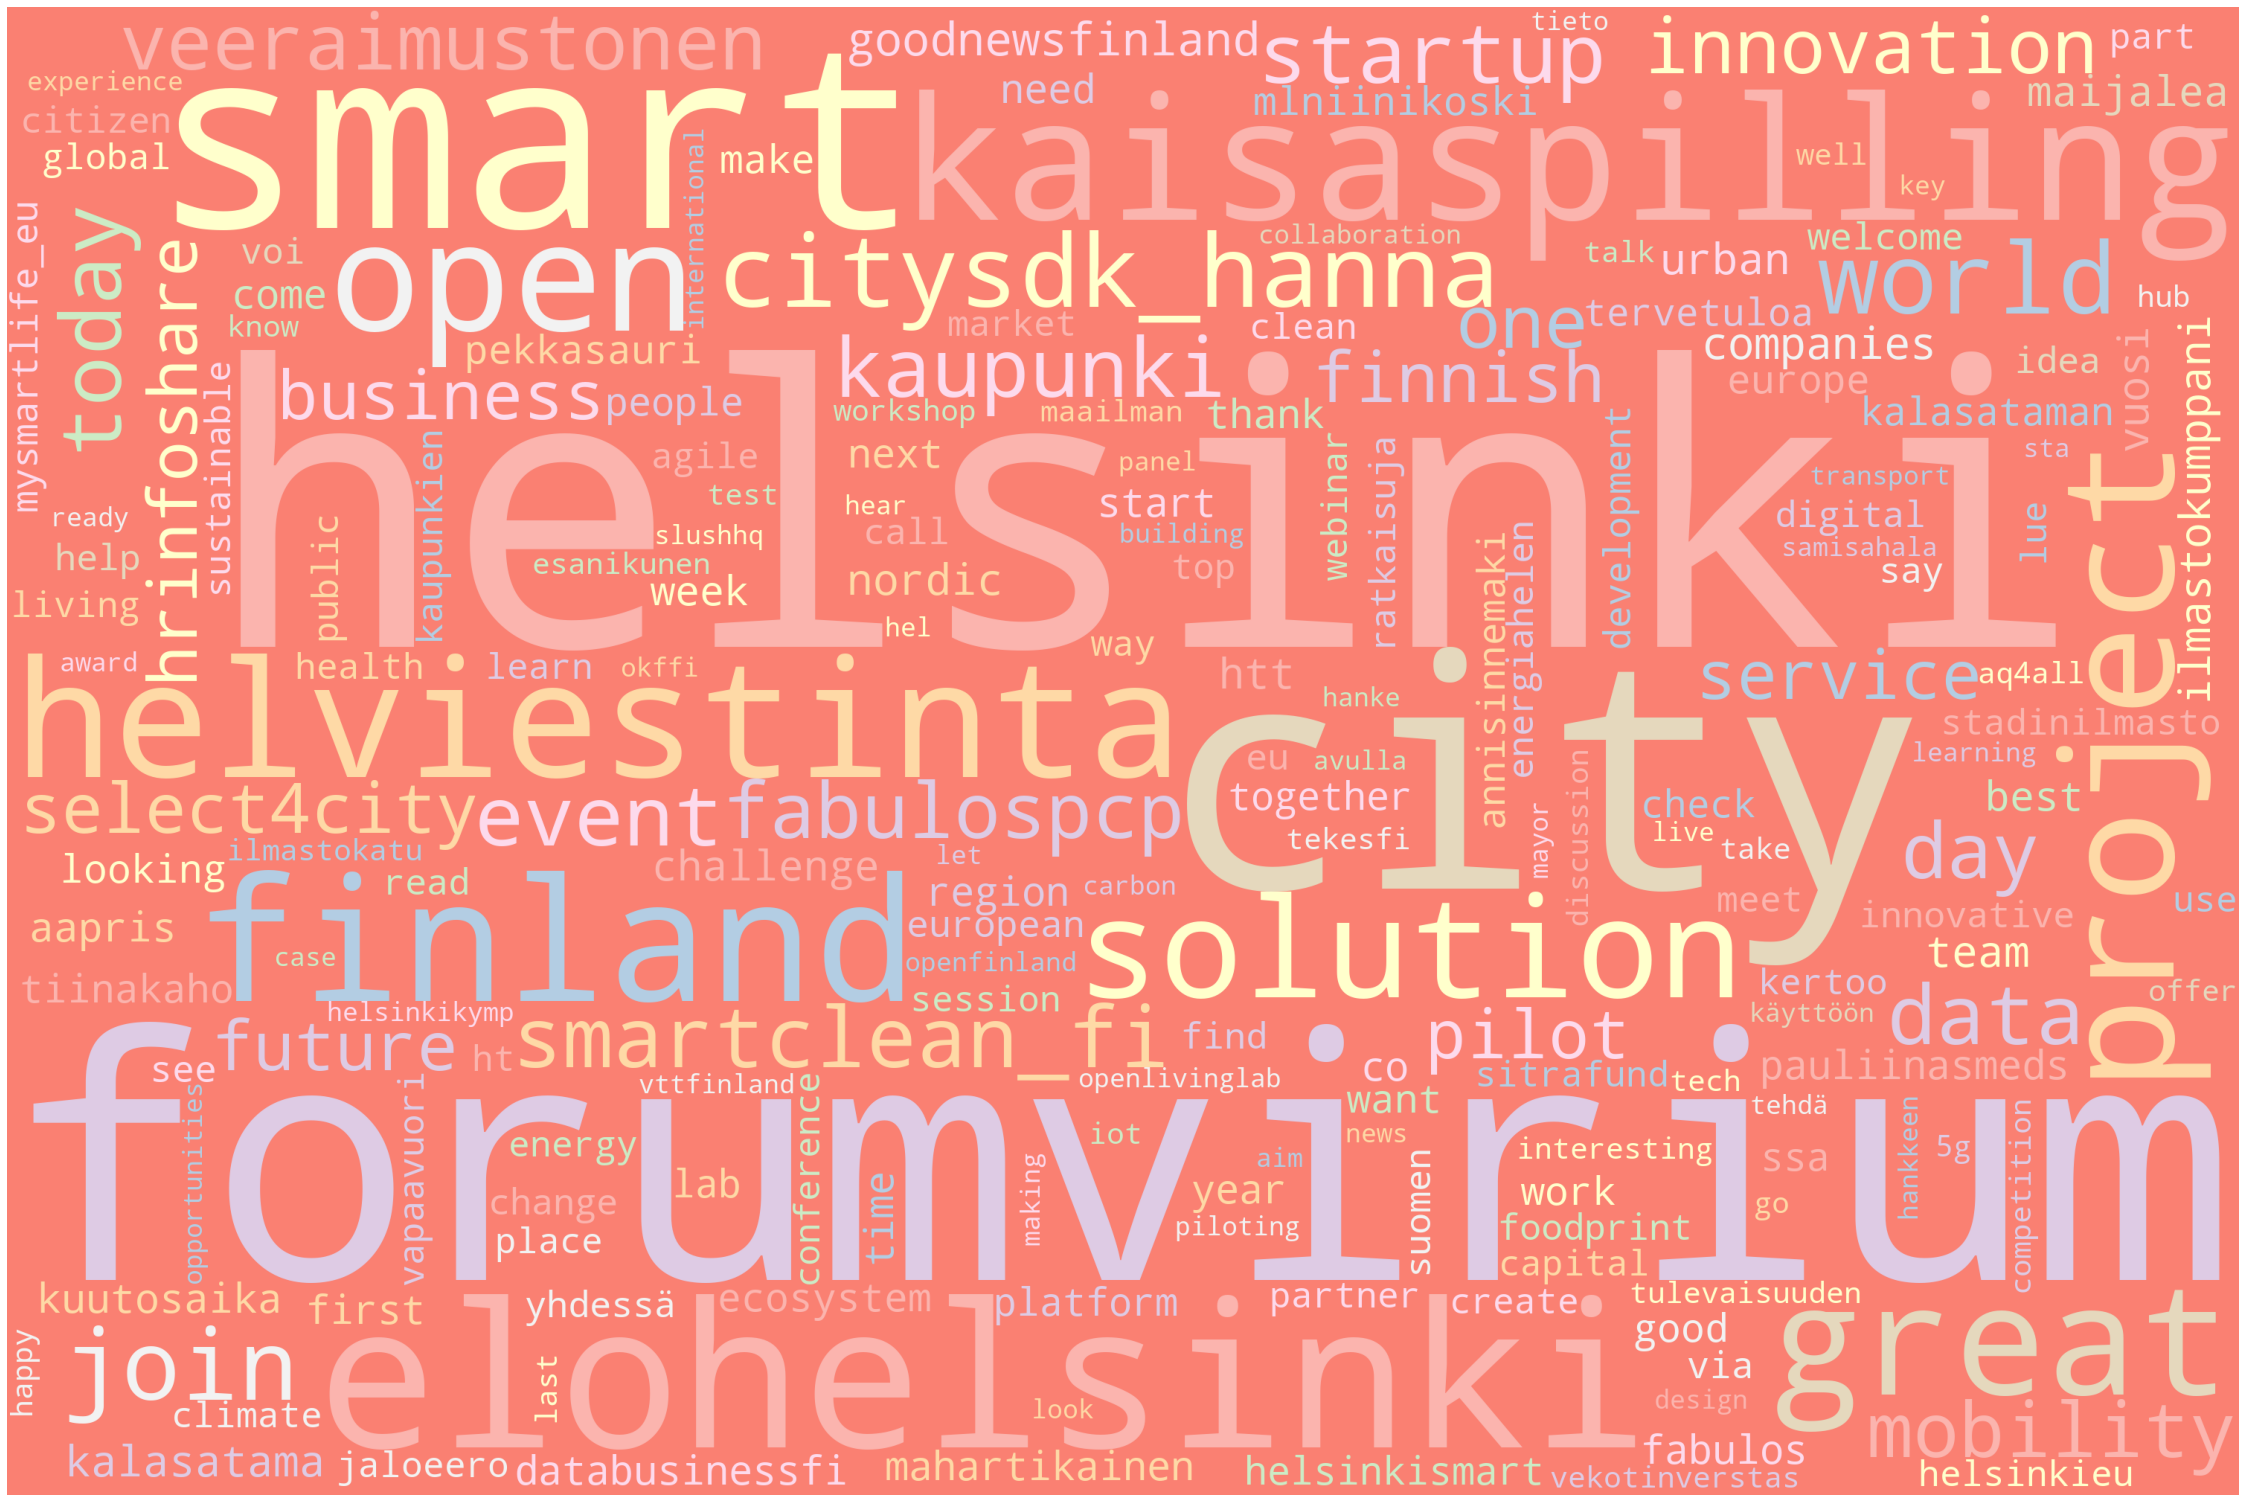

In [14]:
word_cloud.plot_cloud(tweet_words)

## Hashtags

In [15]:
hashtag_entities = utils.get_hashtags(tweets)
most_common_hashtags = Counter(hashtag_entities).most_common(50)
most_common_hashtags

[('helsinki', 1012),
 ('smartcity', 284),
 ('6aika', 247),
 ('avoindata', 247),
 ('iot', 238),
 ('kalasatama', 225),
 ('opendata', 160),
 ('finland', 148),
 ('fiksukalasatama', 145),
 ('smartclean', 126),
 ('nopeatkokeilut', 112),
 ('smartcities', 106),
 ('smarthelsinki', 106),
 ('maas', 96),
 ('startup', 70),
 ('smartmobility', 67),
 ('startups', 60),
 ('smartkalasatama', 54),
 ('robotbus', 52),
 ('api', 51),
 ('mydata', 50),
 ('innovation', 48),
 ('smart', 48),
 ('ilmasto', 47),
 ('data', 46),
 ('ultrahack', 46),
 ('health', 43),
 ('openfinland', 41),
 ('heldev', 40),
 ('cleantech', 37),
 ('circulareconomy', 33),
 ('mobility', 33),
 ('ai', 33),
 ('ilmanlaatu', 32),
 ('5g', 32),
 ('emahelsinki', 32),
 ('kiertotalous', 31),
 ('myhelsinki', 30),
 ('joustotilat', 30),
 ('redi', 29),
 ('ilmastonmuutos', 29),
 ('pcp', 28),
 ('hackathon', 28),
 ('digitalisaatio', 27),
 ('espoo', 27),
 ('helyes', 25),
 ('sustainability', 24),
 ('ai4cities', 24),
 ('hyvinvointi', 24),
 ('sohjoa', 24)]

## Timeline

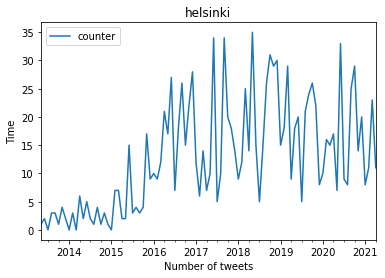

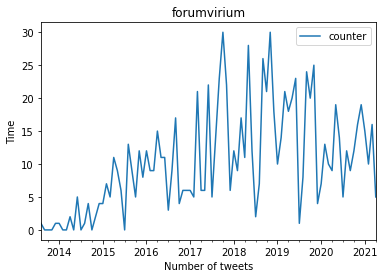

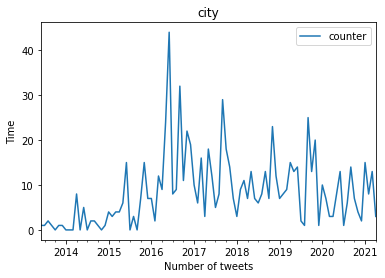

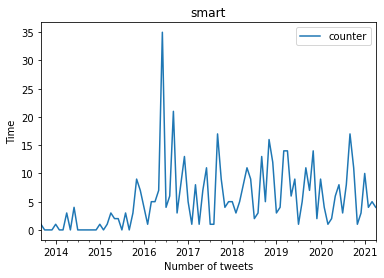

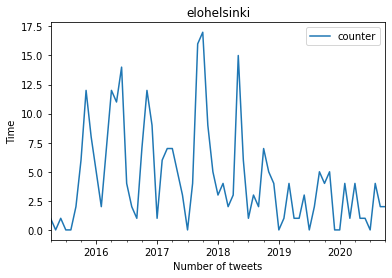

In [16]:
for i in range(5):
    trend_term = most_common_terms[i][0]
    timeline.plot_term_history(trend_term, tweets)

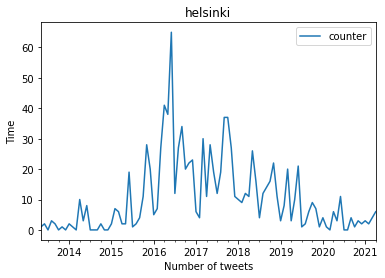

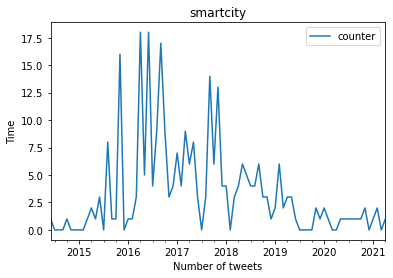

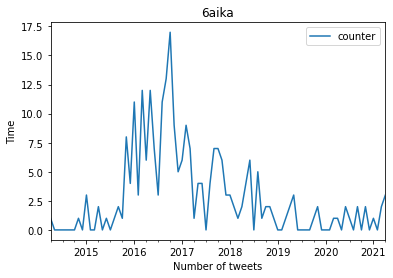

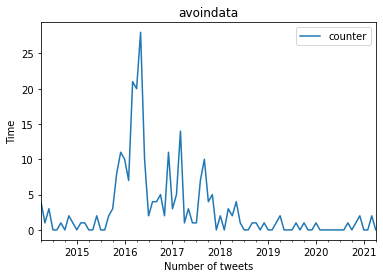

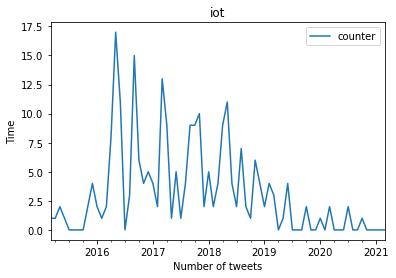

In [17]:
for i in range(5):
    trend_term = most_common_hashtags[i][0]
    timeline.plot_hashtag_history(trend_term, tweets)

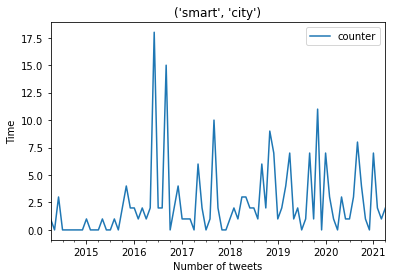

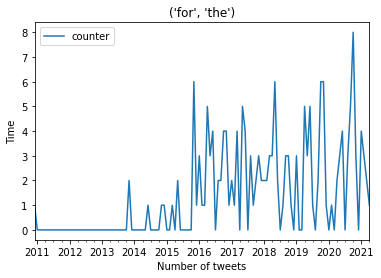

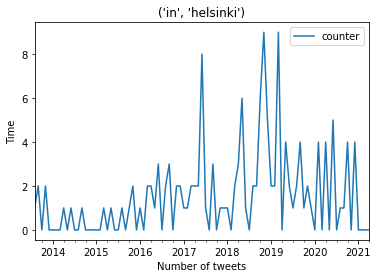

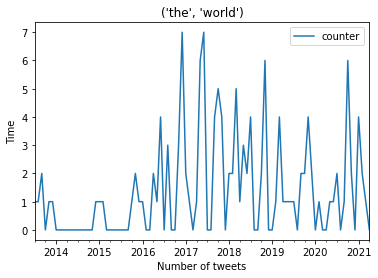

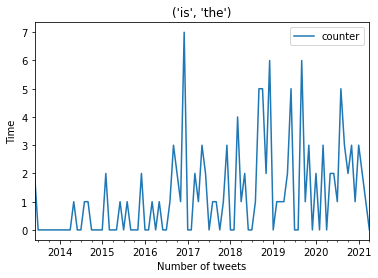

In [18]:
for i in range(5):
    trend_term = most_common_bigrams[i][0]
    timeline.plot_ngram_history(trend_term, tweets)

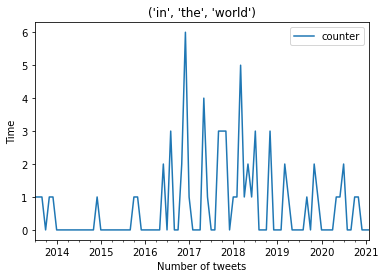

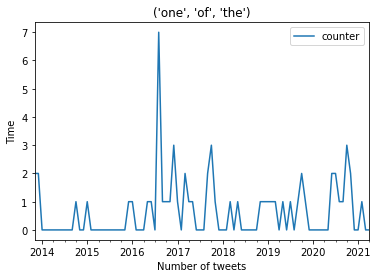

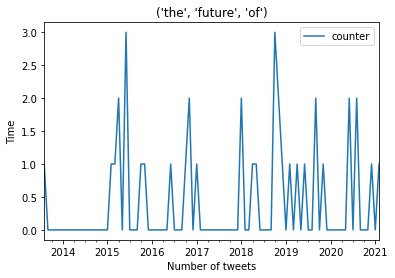

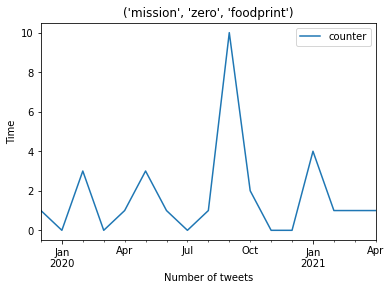

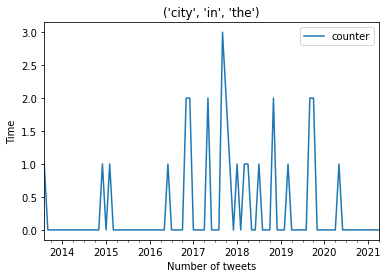

In [19]:
for i in range(5):
    trend_term = most_common_trigrams[i][0]
    timeline.plot_ngram_history(trend_term, tweets)